
1. Fertility Dataset Logistic Regression

 e.1 How can I measure the performance of my model?

Accuracy:

Formula: Accuracy = Number of Correct Predictions/Total Number of Prediction

Confusion Matrix:

A confusion matrix is a table with rows and columns representing the actual and predicted classes, respectively. It contains four terms:
True Positive (TP): Correctly predicted positive instances.
True Negative (TN): Correctly predicted negative instances.
False Positive (FP): Incorrectly predicted positive instances (Type I error).
False Negative (FN): Incorrectly predicted negative instances (Type II error).

Precision:

Formula: Precision = TP/TP+FP


Recall (also known as Sensitivity or True Positive Rate):
Formula:
Recall= TP/TP+FN

F1 Score:

Formula: F1 Score=2× Precision*Recall/Precision+Recall

ROC Curve:

Plot the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.
TPR (Recall) = TP/TP+FN
FPR = FP/FP+TN

Area Under the ROC Curve (AUC):

The area under the ROC curve provides an aggregate measure of performance across all possible classification thresholds. A perfect classifier has an AUC of 1, while a purely random classifier has an AUC of 0.5.

Log Loss (Logarithmic Loss):
Quantifies the accuracy of a probabilistic model.
Measures the difference between predicted probabilities and actual outcomes.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'fertility_Diagnosis.txt'
columns = ['Season', 'Age', 'Childhood Diseases',
            'Accident or Serious Trauma','Surgical Intervention',
            'High Fevers in Last Year',
            'Frequency of Alcohol Consumption','Smoking Habit',
            'Number of Hours Spent Sitting Per Day', 'Diagnosis']
dataset = pd.read_csv(file_path, header=None, names=columns)
# Display the first few rows of the dataset to understand its structure
dataset.head()

,Season,Age,Childhood Diseases,Accident or Serious Trauma,Surgical Intervention,High Fevers in Last Year,Frequency of Alcohol Consumption,Smoking Habit,Number of Hours Spent Sitting Per Day,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Encode the 'Diagnosis' column to numerical format
label_encoder = LabelEncoder()
dataset['Diagnosis'] = label_encoder.fit_transform(dataset['Diagnosis'])
# Split the dataset into features and target variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# Verify the shapes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((80, 9), (20, 9), (80,), (20,))

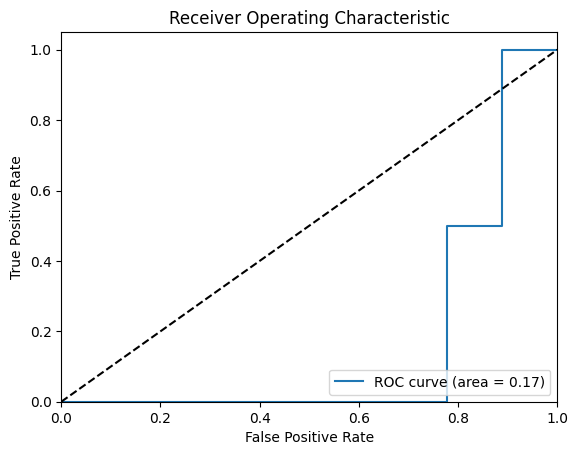

{'Accuracy': 0.9,
 'Confusion Matrix': array([[18,  0],
        [ 2,  0]]),
 'Precision': 0.0,
 'Recall': 0.0,
 'F1 Score': 0.0,
 'ROC AUC': 0.16666666666666669,
 'Log Loss': 0.4650481752720365}

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, log_loss
import numpy as np
import matplotlib.pyplot as plt
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
# Predicting the Test set results
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
# Calculate the evaluation metrics
metrics = {
'Accuracy': accuracy_score(y_test, y_pred),
'Confusion Matrix': confusion_matrix(y_test, y_pred),
'Precision': precision_score(y_test, y_pred, zero_division=0),
'Recall': recall_score(y_test, y_pred),
'F1 Score': f1_score(y_test, y_pred),
'ROC AUC': roc_auc_score(y_test, y_pred_proba),
'Log Loss': log_loss(y_test, y_pred_proba)
}
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics['ROC AUC'])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
metrics

Text(95.72222222222221, 0.5, 'Actual')

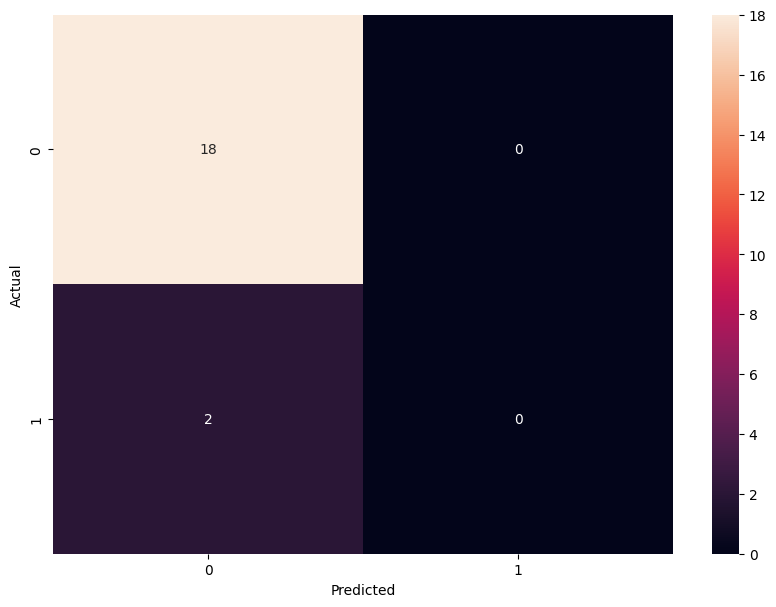

In [7]:
# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

2. Naive_Bayesian Breast Cancer

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score
# Load the new dataset for Breast Cancer Data
data_path ='BreastCancerData.csv'
breast_cancer_data = pd.read_csv(data_path)
# Display the first few rows of the dataset to understand its structure
breast_cancer_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [10]:
# Split the dataset into features (X) and the target variable (y)
X = breast_cancer_data.drop('diagnosis', axis=1).values
y = breast_cancer_data['diagnosis'].values
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = nb_classifier.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{confusion_mat}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9385964912280702
Confusion Matrix: 
[[36  7]
 [ 0 71]]
Precision: 0.9102564102564102
Recall: 1.0
F1 Score: 0.953020134228188


Text(95.72222222222221, 0.5, 'Actual')

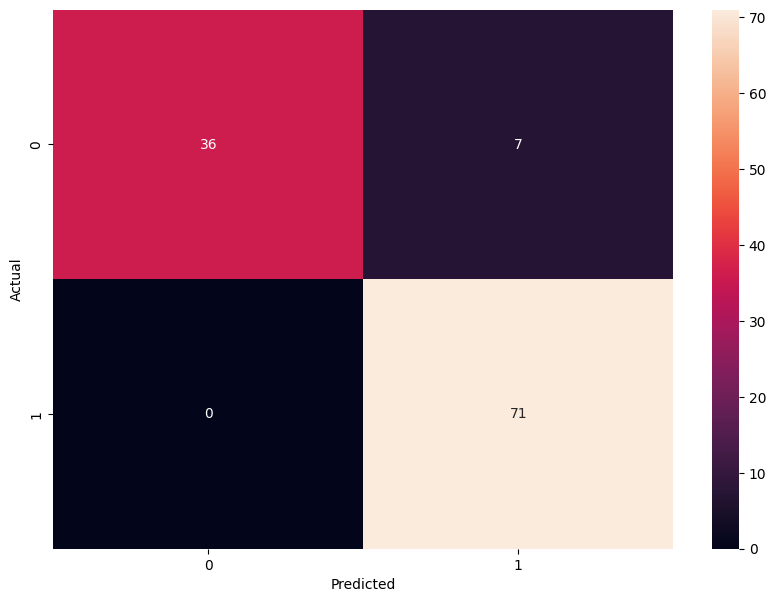

In [11]:
# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')